## Logistic Regression Classification Assignment

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.
Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.
Description of Variables

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married children: number of children
religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi- skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

occupation_husb: husband's occupation (same coding as above) affairs: time spent in extra-marital affairs

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
sns.set()


dta=sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not

dta['affair'] = (dta.affairs > 0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [2]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [3]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [4]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [5]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


#### EDA

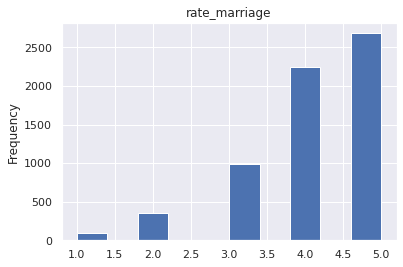

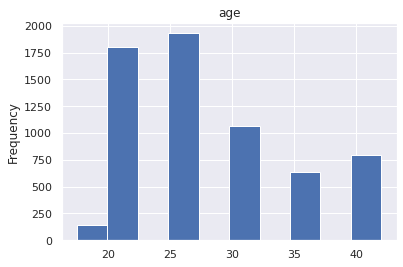

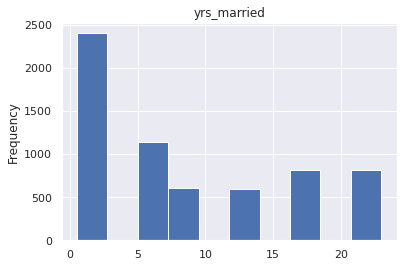

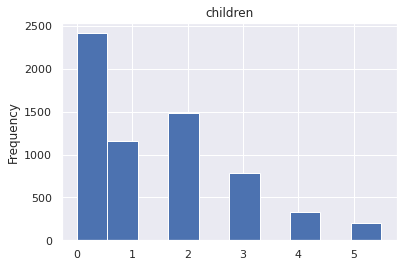

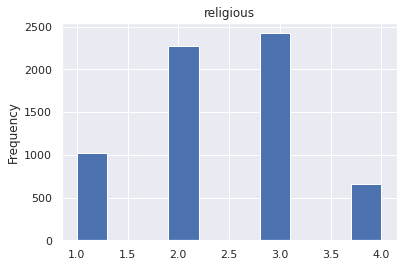

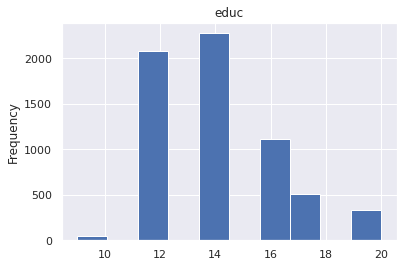

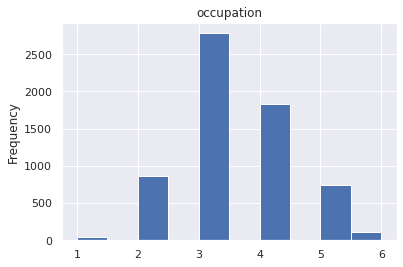

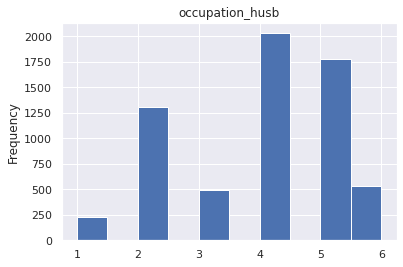

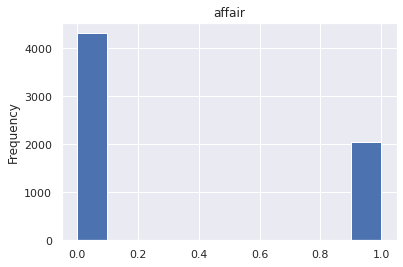

In [6]:
cols=["rate_marriage","age","yrs_married","children","religious","educ","occupation","occupation_husb", "affair"]
num=dta[cols]
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.ylabel("Frequency")
    plt.show()

In [7]:
dta.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [8]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


women who have affairs, rate their marriage lower

In [9]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


increase in age, yrs_married and children correlate with increase in affairs

Text(0, 0.5, 'Frequency')

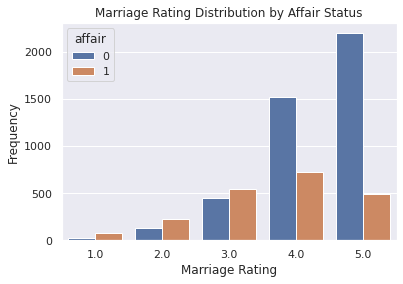

In [10]:
sns.countplot(x='rate_marriage',data=dta,hue='affair')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

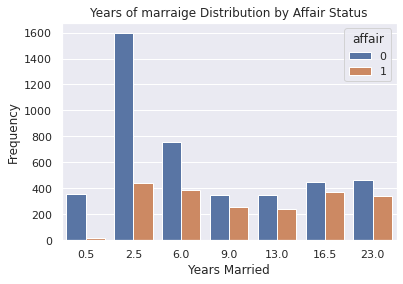

In [11]:
sns.countplot(x='yrs_married',data=dta,hue='affair')
plt.title('Years of marraige Distribution by Affair Status')
plt.xlabel('Years Married')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

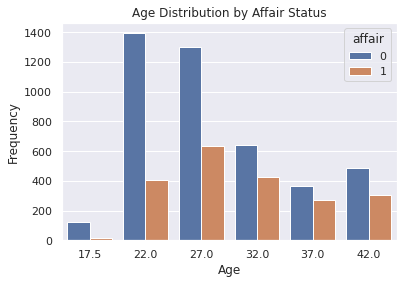

In [12]:
import seaborn as sns
sns.countplot(x='age',data=dta,hue='affair')
plt.title('Age Distribution by Affair Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [13]:
#scalar = StandardScaler()
#X_scaled = scalar.fit_transform(X)

In [14]:
"""vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif"""

'vif = pd.DataFrame()\nvif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]\nvif["Features"] = X.columns\n\n#let\'s check the values\nvif'

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4456, 17)
(4456,)
(1910, 17)
(1910,)


In [16]:
#use the statsmodels Logit function for logistic regression
logit = sm.Logit(y_train, X_train)
# fit the model
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.544479
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4456
Model:                          Logit   Df Residuals:                     4439
Method:                           MLE   Df Model:                           16
Date:                Sun, 07 Feb 2021   Pseudo R-squ.:                  0.1360
Time:                        02:13:34   Log-Likelihood:                -2426.2
converged:                       True   LL-Null:                       -2808.3
Covariance Type:            nonrobust   LLR p-value:                2.844e-152
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4842      0.777      3.198      0.001       0.961       4.007
occ_2             0.9414      0.658      1.432      0.152      -0.347       2.230
occ_3             1.2324      0.652      1.890      0.059      -0.046       2.511
occ_4             0.9731      0.653      1.490      0.136      -0.307       2.254
occ_5             1.6017      0.657      2.436      0.015       0.313       2.890
occ_6             1.8242      0.707      2.581      0.010       0.439       3.209
occ_husb_2        0.0649      0.215      0.302      0.762      -0.356       0.486
occ_husb_3        0.1976      0.235      0.841      0.400      -0.263       0.658
occ_husb_4        0.0304      0.208      0.146      0.884      -0.377       0.438
occ_husb_5       -0.0052      0.210     -0.025      0.980      -0.417       0.406
occ_husb_6       -0.0183      0.236     -0.078      0.938      -0.481       0.445
rate_marriage    -0.7145      0.038    -18.929      0.000      -0.788      -0.640
age              -0.0577      0.012     -4.686      0.000      -0.082      -0.034
yrs_married       0.1081      0.013      8.243      0.000       0.082       0.134
children         -0.0126      0.038     -0.329      0.742      -0.088       0.062
religious        -0.3889      0.042     -9.342      0.000      -0.470      -0.307
educ              0.0046      0.021      0.224      0.823      -0.036       0.045
=================================================================================
"""

**Drop those features whose p value > 5%**

In [17]:
X.drop(labels=["occ_2", "occ_4", "occ_husb_2","occ_husb_3", "occ_husb_4", "occ_husb_5","occ_husb_6", "children", "educ"],axis=1, inplace=True)

In [18]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4456, 8)
(4456,)
(1910, 8)
(1910,)


In [20]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 1.]]


In [21]:
print(f"Training set has {round(clf.score(X_train,y_train)*100,2)} accuracy")
print(f"Test set has {round(clf.score(X_test,y_test)*100,2)} accuracy")

Training set has 72.46 accuracy
Test set has 73.09 accuracy


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[1170  133]
 [ 381  226]]
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.64      1910
weighted avg       0.71      0.73      0.71      1910



In [23]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)

Precision = true_positive/(true_positive+false_positive)

Recall = true_positive/(true_positive+false_negative)

F1_Score = 2*(Recall * Precision) / (Recall + Precision)

auc = roc_auc_score(y_test, y_pred)

print(f"The F1_Score is {F1_Score}")
print(f"The Recall is {Recall}")
print(f"The Precision is {Precision}")
print(f"The Accuracy is {Accuracy}")
print(f"The auc is {auc}")

The F1_Score is 0.8199018920812894
The Recall is 0.7543520309477756
The Precision is 0.8979278587874137
The Accuracy is 0.7308900523560209
The auc is 0.6351253791465898


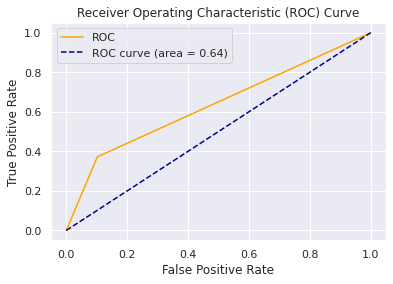

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

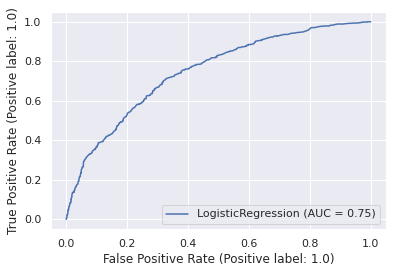

In [25]:
from sklearn.metrics import plot_roc_curve
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()                               